In [15]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data

market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
# Fit the scaler to the DataFrame and transform the data
scaled_market_aray = scaler.fit_transform(market_data_df)

# data is now scaled with a mean of zero and a standard dev of 1
# however it is a numpy array NOT A DATAFRAME



scaled_market_aray[:6]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695],
       [ 0.89187071,  1.32729453,  0.80021418, -0.0571479 ,  0.77865311,
        -0.18823192, -0.2255326 ]])

In [5]:
def fix_tuple_issue(the_tuple):
    return the_tuple[0]

# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_market_aray, columns=[market_data_df.columns])

# note: conventional approach 
#   scaled_df["coin_id"] = market_data_df.index
#   scaled_df.set_index("coin_id", inplace = True)
# had issues. the values ended up as tuples. I found an alternate way that eliminated the issue and requires only one line of code.

# Set the coinid column as index
scaled_df.index = market_data_df.index

# Display sample data
display(scaled_df.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = np.arange(1,12)

# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k_list:
    kmeans = KMeans(n_clusters=i, n_init = 'auto',max_iter=300, random_state=0)
    kmeans.fit(scaled_df)
    inertia_list.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
the_dictionary = {"k":k_list, "inertia":inertia_list}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(the_dictionary,columns = ["k","inertia"])

# Display the DataFrame
df_elbow


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve: Inertia vs k'}, xlabel='k', ylabel='Inertia'>

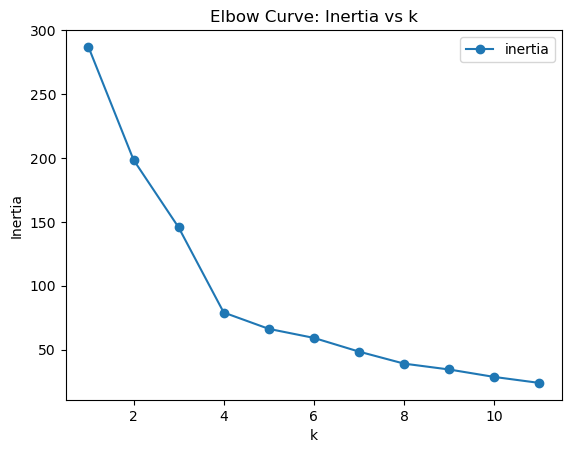

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k',y='inertia',title = 'Elbow Curve: Inertia vs k', xlabel = 'k', ylabel='Inertia', style = '-o')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  There is a clear 'elbow' at k=4. After this, the rate of decrease is smaller.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model_k4 = KMeans(n_clusters=4, n_init = 'auto',max_iter=300, random_state=0)

In [9]:
# Fit the K-Means model using the scaled data
model_k4.fit(scaled_df)


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_from_scaled = model_k4.predict(scaled_df)

# View the resulting array of cluster values.
predict_from_scaled

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
scaled_df_w_predict = scaled_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_w_predict['cluster_from_scaled'] = predict_from_scaled
# Display sample data
scaled_df_w_predict.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_from_scaled
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Price Change % 7 Day versus 24 Hour, Cluster from Scaled'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

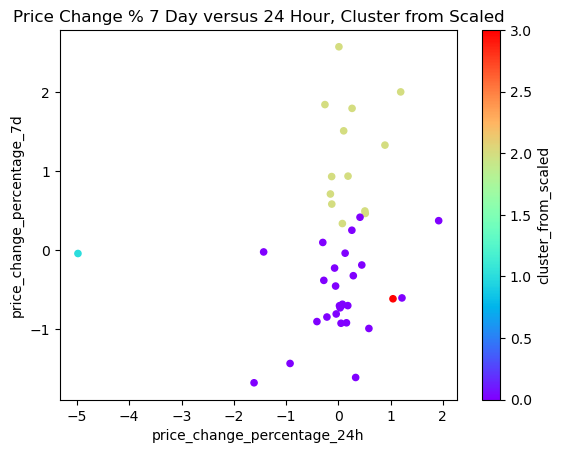

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_df_w_predict.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d",title = "Price Change % 7 Day versus 24 Hour, Cluster from Scaled", c="cluster_from_scaled", colormap = 'rainbow')

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
X_pca = pca.fit_transform(scaled_df)
# Review the first five rose of the PCA data
# using bracket notation ([0:5])




# View the first five rows of the DataFrame. 
print(X_pca[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
result = pca.explained_variance_ratio_
print("result of explained variance ratio")
display(result)
variance_explained = sum(result)*100
print(f"total variance explained: {variance_explained:.1f}")


result of explained variance ratio


array([0.3719856 , 0.34700813, 0.17603793])

total variance explained: 89.5


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [21]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you NOTE: I don't see it
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(X_pca,columns = ['PC1', 'PC2','PC3'])

# Copy the crypto names from the original data
# Set the coinid column as index
df_pca.index = market_data_df.index

# Display sample data
df_pca.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = np.arange(1,11)
# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_list:
    kmean = KMeans(n_clusters=i,max_iter=300,random_state=1,n_init='auto')
    kmean.fit(df_pca)
    inertia_list.append(kmean.inertia_)

# Create a dictionary with the data to plot the Elbow curve
the_dict = {"k":k_list,"inertia":inertia_list}

# Create a DataFrame with the data to plot the Elbow curve
df_k_inertia = pd.DataFrame(the_dict,columns = ['k','inertia'])

# Display the DataFrame
df_k_inertia

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve Inertia vs K'}, xlabel='k', ylabel='inertia'>

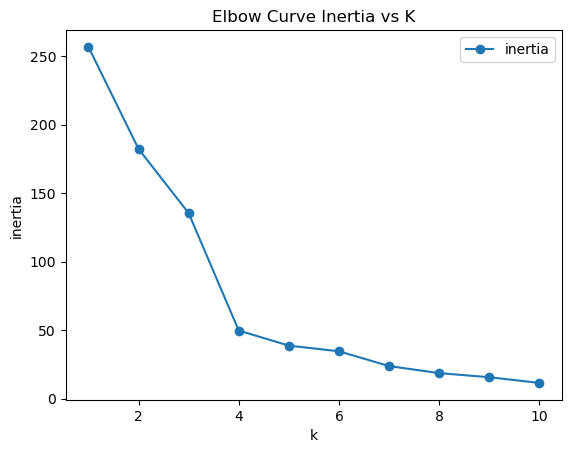

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_k_inertia.plot.line(x='k',y='inertia',xlabel='k',ylabel='inertia',title = 'Elbow Curve Inertia vs K', style = '-o')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4 is the best value. There is a clear and sharp 'elbow'


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** In this instance at least, it does not differ from the original analysis using scaled data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model_k4_pca = KMeans(n_clusters=4, n_init = 'auto', max_iter=300, random_state=0)

In [33]:
# Fit the K-Means model using the PCA data
model_k4_pca.fit(df_pca)


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = model_k4_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(predicted_clusters_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [35]:
# Create a copy of the DataFrame with the PCA data
df_pca_w_pred = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_w_pred['clusters_pca'] = predicted_clusters_pca

# Display sample data
df_pca_w_pred.head(10)

,PC1,PC2,PC3,clusters_pca
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: title={'center': 'PC2 vs PC1 Colored by Cluster'}, xlabel='PC1', ylabel='PC2'>

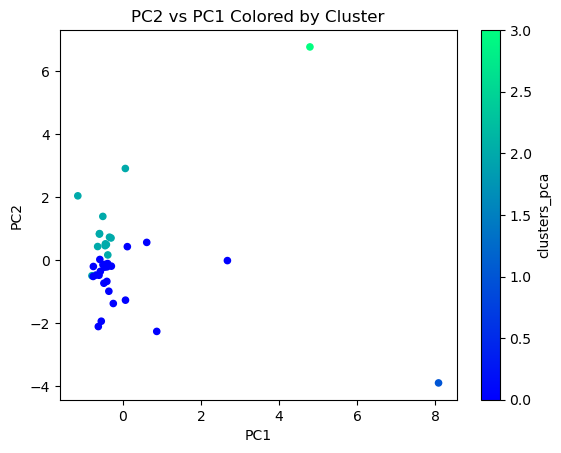

In [36]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

df_pca_w_pred.plot.scatter(x='PC1',y='PC2',c='clusters_pca',colormap = 'winter',title = 'PC2 vs PC1 Colored by Cluster')

### Determine the Weights of Each Feature on each Principal Component

In [39]:
# Use the columns from the original scaled DataFrame as the index.
print(pca.components_)
print("")
df_pca_weights = pd.DataFrame(pca.components_, columns = scaled_df.columns)
df_pca_weights.head(10)

[[-0.41672777 -0.10243154 -0.0091623   0.1915226   0.32036496  0.59446798
   0.56837928]
 [ 0.35816187  0.22743192  0.54041516  0.56218228  0.43403994  0.02773475
  -0.15078941]
 [-0.21879492  0.7876703   0.34953356 -0.18174374 -0.36137707  0.03973325
   0.21054134]]



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
1,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
2,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
For Principle Component 1 (PC1), price_change_percentage_200d has the higest influence, followed closely by price_change_percentage_1y and then finally price_change_percentage_24h.

For For Principle Component 2 (PC2), price_change_percentage_30d has the largest effect, followed by price_change_percentage_14d, and then price_change_percentage_60d.

For For Principle Component 3 (PC3), price_change_percentage_7d has the highest influence, followed by price_change_percentage_60d, and then price_change_percentage_14d.
    